<h1 align="center">-- ML's Algorithms Analysis --</h1>

In [97]:
from sklearn.datasets import load_iris, load_digits, load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import time

In [109]:
def get_dataset(index):
    if index < 5:
        dataset = load_iris()
    elif index < 10:
        dataset = load_digits()
    elif index < 15:
        dataset = load_breast_cancer()
    elif index  >= 15:
        dataset = load_wine()
    
    return dataset.data, dataset.target

## Naive Bayes

### Descripción: Naive Bayes es un algoritmo de clasificación supervisada basado en el teorema de Bayes con una suposición "ingenua" de independencia entre las características. A pesar de esta suposición optimista, Naive Bayes ha demostrado ser efectivo en una amplia gama de problemas de clasificación

### Parámetros: El único parámetro de NB es el alpha. Este especifica la fuerza que se le da al suavizado de Laplace (Laplace Smoothing). Mientras más alto sea el alpha, más fuerte será el suavizado.

### Valores de retorno:
#### - class_count_: Una matriz que almacena el número de muestras de entrenamiento observadas en cada clase. 
#### - class_prior_: La probabilidad a priori de cada clase. Es decir, la probabilidad de que una muestra pertenezca a cada clase antes de observar los datos de entrada.
#### - classes_: Las etiquetas de las clases.
#### - theta_: Una matriz que almacena la media de cada característica por clase en el caso de GaussianNB (Naive Bayes Gaussiano). Específicamente, theta_[i, j] es la media de la característica j para la clase i.
#### - sigma_: Una matriz que almacena la varianza de cada característica por clase en el caso de GaussianNB (Naive Bayes Gaussiano). Específicamente, sigma_[i, j] es la varianza de la característica j para la clase i.

Fuentes: [Documentación Naive Bayes SKlearn](https://scikit-learn.org/stable/modules/naive_bayes.html)

### Aplicación y Justificación: 
#### La aplicabilidad de Naive Bayes radica en su simplicidad y eficiencia computacional. Debido a su suposición de independencia entre las características, Naive Bayes puede funcionar bien incluso en conjuntos de datos de alta dimensionalidad y es particularmente útil cuando hay una gran cantidad de características. Además, Naive Bayes tiene una complejidad computacional baja durante el entrenamiento y la predicción, lo que lo hace adecuado para conjuntos de datos grandes. Sin embargo, su rendimiento puede verse afectado si las características no son realmente independientes o si hay una falta de datos de entrenamiento.

In [121]:
nb_classifier = GaussianNB()

In [122]:
nb_training_times = []
nb_prediction_times = []

for x in range(20):
    X, y = get_dataset(x)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    nb_classifier = GaussianNB()

    start_time = time.time()*1000
    nb_classifier.fit(X_train, y_train)
    training_time = time.time()*1000 - start_time
    nb_training_times.append(training_time)

    start_time = time.time()*1000
    y_pred = nb_classifier.predict(X_test)
    prediction_time = time.time()*1000 - start_time
    nb_prediction_times.append(prediction_time)

nb_training_times.sort()
nb_prediction_times.sort()

In [123]:
print("Tiempos de entrenamiento:", nb_training_times)
print("Tiempos de predicción:", nb_prediction_times)

Tiempos de entrenamiento: [0.996337890625, 1.981689453125, 1.99365234375, 1.99560546875, 1.99658203125, 1.99658203125, 1.997314453125, 1.999267578125, 2.001220703125, 2.005126953125, 2.00634765625, 2.007568359375, 2.988037109375, 2.993896484375, 2.999755859375, 3.000244140625, 3.015625, 4.0029296875, 4.99365234375, 4.995361328125]
Tiempos de predicción: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.989501953125, 0.99853515625, 1.000244140625, 1.000244140625, 1.002197265625, 1.005126953125, 1.0068359375, 1.01025390625, 1.990234375, 2.006591796875, 2.013916015625]


Polinomio de ajuste (Tiempos de entrenamiento):          2
0.01256 x - 0.08633 x + 1.867
Polinomio de ajuste (Tiempos de predicción):           2
0.004965 x + 0.01883 x - 0.09089


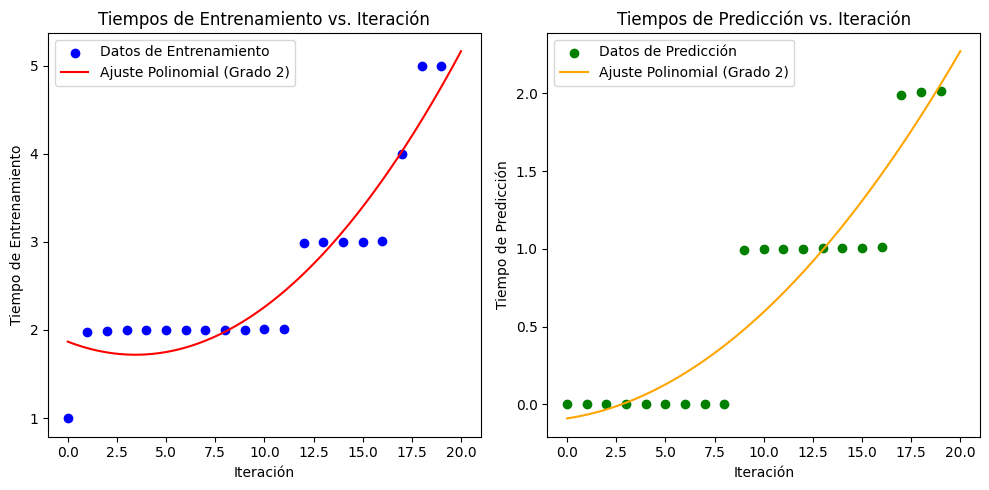

In [124]:
degree_train = 2 
p_train = np.poly1d(np.polyfit(range(len(nb_training_times)), nb_training_times, degree_train))

degree_pred = 2 
p_pred = np.poly1d(np.polyfit(range(len(nb_prediction_times)), nb_prediction_times, degree_pred))

print(f"Polinomio de ajuste (Tiempos de entrenamiento): {p_train}")
print(f"Polinomio de ajuste (Tiempos de predicción): {p_pred}")

x_vals = np.linspace(0, len(nb_training_times), 100)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(range(len(nb_training_times)), nb_training_times, color='blue', label='Datos de Entrenamiento')
plt.plot(x_vals, p_train(x_vals), color='red', label=f'Ajuste Polinomial (Grado {degree_train})')
plt.xlabel('Iteración')
plt.ylabel('Tiempo de Entrenamiento')
plt.title('Tiempos de Entrenamiento vs. Iteración')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(range(len(nb_prediction_times)), nb_prediction_times, color='green', label='Datos de Predicción')
plt.plot(x_vals, p_pred(x_vals), color='orange', label=f'Ajuste Polinomial (Grado {degree_pred})')
plt.xlabel('Iteración')
plt.ylabel('Tiempo de Predicción')
plt.title('Tiempos de Predicción vs. Iteración')
plt.legend()

plt.tight_layout()
plt.show()

## Linear Regression

### Descripción:
#### La Regresión Lineal es un algoritmo de aprendizaje supervisado que se utiliza para predecir el valor de una variable dependiente en función de una o más variables independientes. Busca encontrar la mejor línea de ajuste que minimice la suma de los errores cuadrados entre los valores observados y los valores predichos.

### Parámetros:
#### La Regresión Lineal no tiene parámetros adicionales en su forma básica. Sin embargo, se pueden considerar variantes como la regularización Lasso (L1) o Ridge (L2), que tienen parámetros como `alpha` que controlan la fuerza de la regularización.

### Valores de retorno:
#### La Regresión Lineal proporciona varios valores de retorno después de ser entrenada con los datos:
- **coef_**: Un array que almacena los coeficientes de la regresión lineal para cada característica.
- **intercept_**: El término de intersección de la regresión lineal.
- **rank_**: El rango de la matriz de diseño.
- **singular_**: Los valores singulares de la matriz de diseño.

#### En el caso de la regresión lineal múltiple, `coef_` proporcionará un coeficiente para cada característica de entrada.

Fuentes: [Documentación Linear Regression SKlearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


### Aplicación y Justificación:
#### La Regresión Lineal es una técnica de aprendizaje supervisado utilizada para predecir valores continuos en función de características de entrada. Es especialmente útil cuando la relación entre las características y la variable objetivo es lineal y la interpretabilidad del modelo es importante. Aunque puede verse limitada por relaciones no lineales o multicolinealidad, ofrece una baja complejidad computacional durante el entrenamiento y la predicción, lo que la hace eficiente en términos de recursos y escalable para conjuntos de datos grandes. Este aspecto computacional hace que la Regresión Lineal sea una opción atractiva en aplicaciones donde se requiere una rápida implementación y análisis de grandes volúmenes de datos.


In [133]:
linear = LinearRegression()

In [134]:
linear_training_times = []
linear_prediction_times = []

for x in range(20):
    X, y = get_dataset(x)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    linear = LinearRegression()

    start_time = time.time()*1000
    linear.fit(X_train, y_train)
    training_time = time.time()*1000 - start_time
    linear_training_times.append(training_time)

    start_time = time.time()*1000
    y_pred = linear.predict(X_test)
    prediction_time = time.time()*1000 - start_time
    linear_prediction_times.append(prediction_time)

linear_training_times.sort()
linear_prediction_times.sort()

In [135]:
print("Tiempos de entrenamiento:", linear_training_times)
print("Tiempos de predicción:", linear_prediction_times)

Tiempos de entrenamiento: [0.992919921875, 0.99951171875, 1.00048828125, 1.0009765625, 1.005859375, 1.008056640625, 1.01171875, 1.02001953125, 1.958740234375, 2.993896484375, 2.9951171875, 3.999267578125, 4.008544921875, 5.005615234375, 5.00732421875, 18.989013671875, 19.9873046875, 20.0029296875, 21.996826171875, 26.00341796875]
Tiempos de predicción: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99169921875, 0.99560546875, 0.997802734375, 1.000244140625, 1.0009765625, 1.001708984375, 1.00341796875, 1.00390625, 1.006103515625, 1.00927734375]


Polinomio de ajuste (Tiempos de entrenamiento):         2
0.1324 x - 1.278 x + 2.835
Polinomio de ajuste (Tiempos de predicción):            2
7.598e-05 x + 0.07403 x - 0.2121


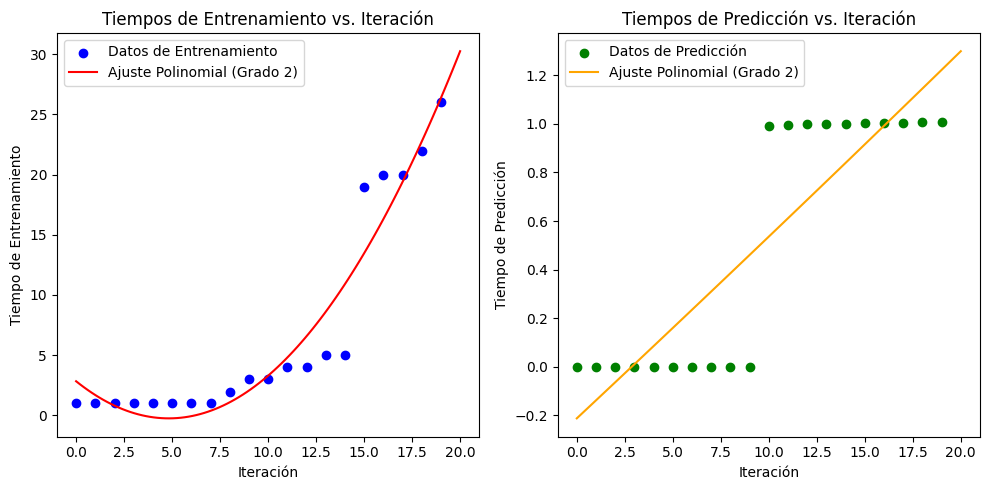

In [136]:
degree_train = 2 
p_train = np.poly1d(np.polyfit(range(len(linear_training_times)), linear_training_times, degree_train))

degree_pred = 2 
p_pred = np.poly1d(np.polyfit(range(len(linear_prediction_times)), linear_prediction_times, degree_pred))

print(f"Polinomio de ajuste (Tiempos de entrenamiento): {p_train}")
print(f"Polinomio de ajuste (Tiempos de predicción): {p_pred}")

x_vals = np.linspace(0, len(linear_training_times), 100)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(range(len(linear_training_times)), linear_training_times, color='blue', label='Datos de Entrenamiento')
plt.plot(x_vals, p_train(x_vals), color='red', label=f'Ajuste Polinomial (Grado {degree_train})')
plt.xlabel('Iteración')
plt.ylabel('Tiempo de Entrenamiento')
plt.title('Tiempos de Entrenamiento vs. Iteración')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(range(len(linear_prediction_times)), linear_prediction_times, color='green', label='Datos de Predicción')
plt.plot(x_vals, p_pred(x_vals), color='orange', label=f'Ajuste Polinomial (Grado {degree_pred})')
plt.xlabel('Iteración')
plt.ylabel('Tiempo de Predicción')
plt.title('Tiempos de Predicción vs. Iteración')
plt.legend()

plt.tight_layout()
plt.show()